In [1]:
import SigVarGen as svg
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
domain = 'Arduino Board'
sig_len = 1000

t = np.linspace(0, 1, sig_len) #representing 1000 samples per second
n_sinusoids = random.randint(20, 50)

drop = False

In [3]:
signal_range, interrupt_range = svg.generate_device_parameters(svg.EMBEDDED_DEVICE_RANGES, drop=drop, frequency_follows_amplitude=False, split_ratio=0.7)

In [4]:
amplitude_range = signal_range[domain]['amplitude']
frequency_range = signal_range[domain]['frequency']

In [5]:
base_wave, sinusoids_params = svg.generate_signal(t, n_sinusoids, amplitude_range, frequency_range)

In [6]:
np.min(base_wave)

0.4037372889690478

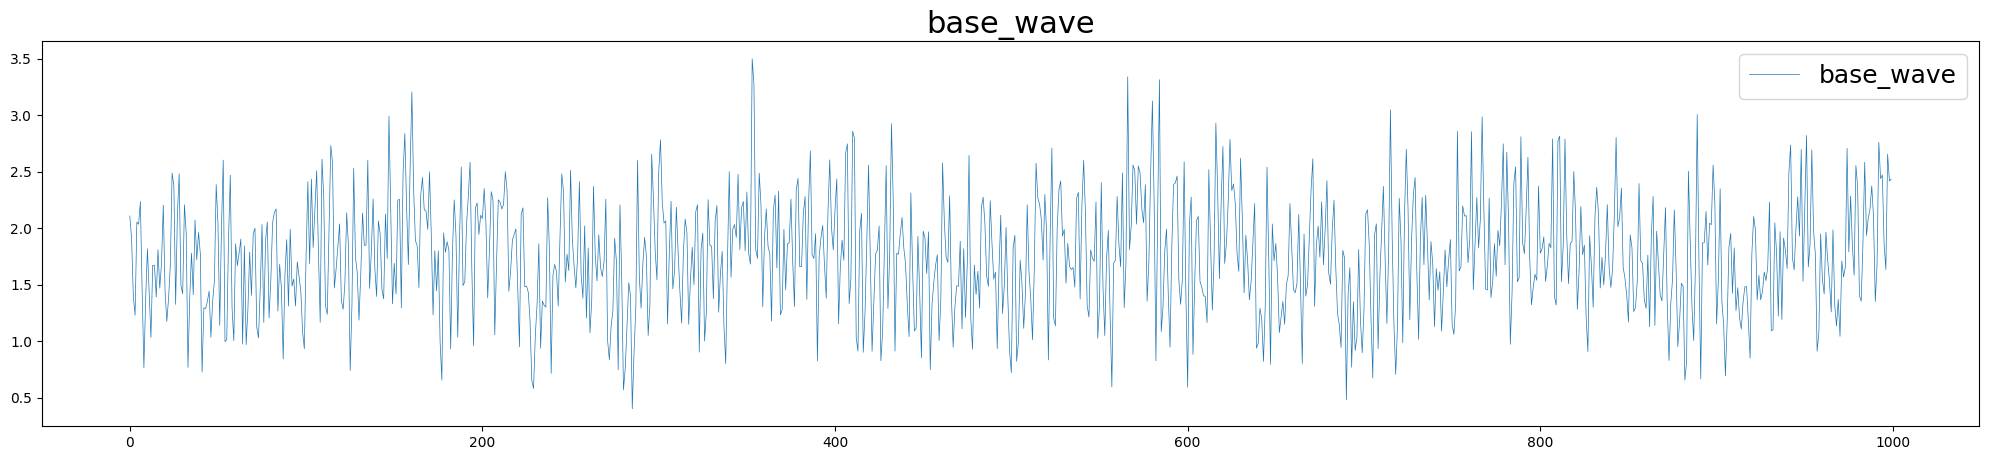

In [7]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=0.5)
plt.title(f"base_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [16]:
var_wave = svg.add_interrupt_bursts(t, base_wave.copy(), domain, {'Arduino Board': {'amplitude': (0, 5), 'frequency': (0, 10000.0)}}, device_min=0, device_max=4, temp=0,
    start_idx=0, end_idx=0, n_small_interrupts=20, non_overlap=False, small_duration_ratio_range=(0.001,0.009))

(187, 193)
(351, 358)
(389, 392)
(201, 208)
(422, 430)
(164, 166)
(409, 412)
(459, 467)
(376, 377)
(954, 962)
(112, 116)
(88, 96)
(814, 816)
(450, 452)
(930, 932)
(416, 421)
(112, 113)
(697, 701)
(481, 482)
(711, 714)


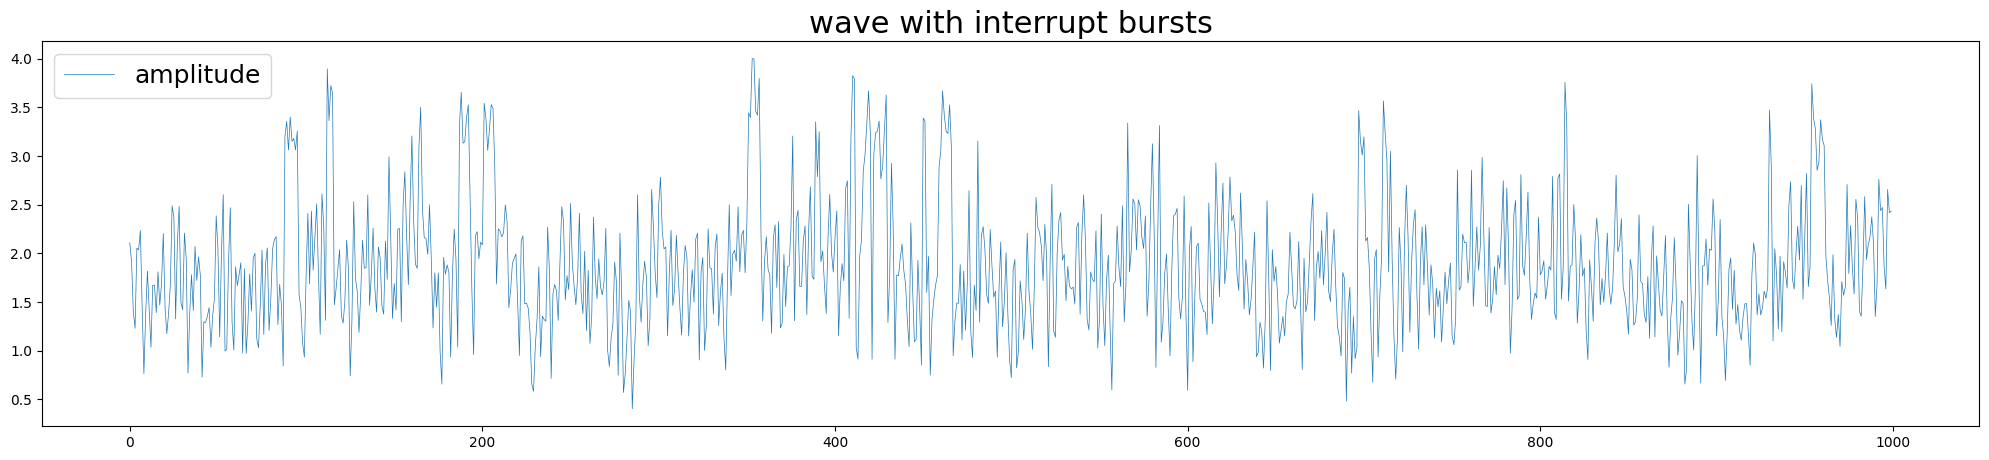

In [22]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(var_wave)), var_wave, label='amplitude', linewidth=0.5)
plt.title(f"wave with interrupt bursts", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [18]:
wave, interrupt_params = svg.add_interrupt_with_params(t, var_wave.copy(), domain, signal_range, interrupt_range, 
                                            0, duration_ratio=0.08, disperse=False, drop=drop, complex_iter=2, shrink_complex=True)

(446, 526)
(590, 596)


In [19]:
max(wave)

4.536449949571266

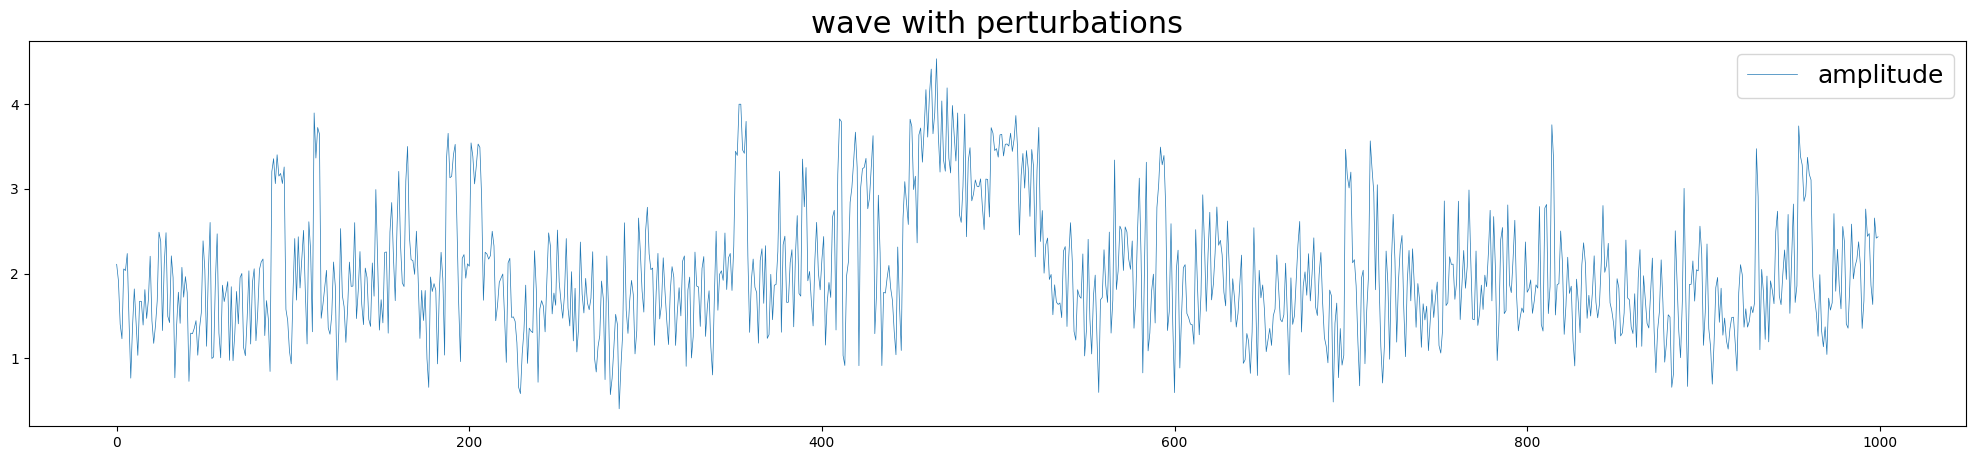

In [20]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(wave)), wave, label='amplitude', linewidth=0.5)
plt.title(f"wave with perturbations", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [30]:
domain = 'Cameras'
sig_len = 1000

t = np.linspace(0, 1, sig_len)
n_sinusoids = 10 #random.randint(20, 50)

drop = True

In [31]:
signal_range, interrupt_range = svg.generate_device_parameters(svg.EMBEDDED_DEVICE_RANGES, drop=drop, frequency_follows_amplitude=False, split_ratio=0.3)

amplitude_range = signal_range[domain]['amplitude']
frequency_range = signal_range[domain]['frequency']

frequency_subrange_key = 0 #random.choice(list(frequency_range.keys())) - if multiple frequency ranges per domain

base_frequency_range = (frequency_range[0], frequency_range[0] + (frequency_range[1] - frequency_range[0]) * 1)

In [32]:
base_wave, sinusoids_params = svg.generate_signal(t, n_sinusoids, amplitude_range, base_frequency_range)

In [33]:
np.mean(base_wave)

0.65

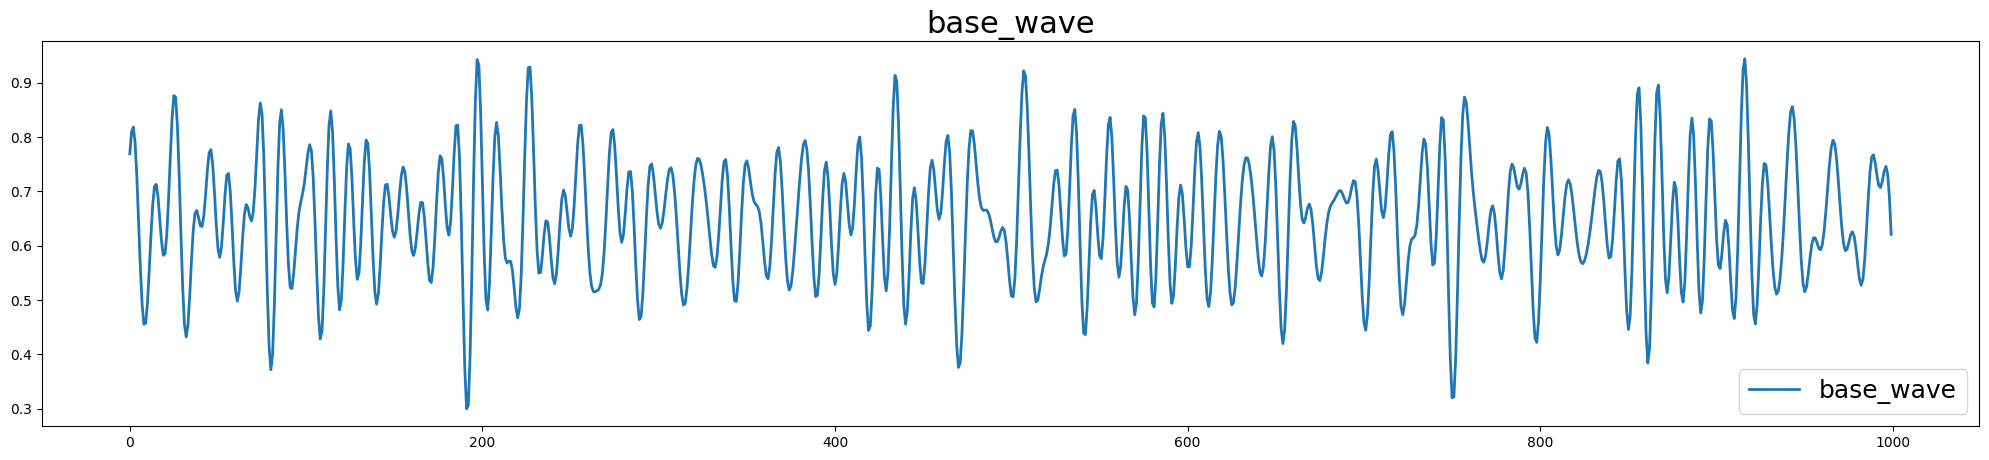

In [34]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=2)
plt.title(f"base_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [35]:
wave, interrupt_params = svg.add_interrupt_with_params(t, base_wave.copy(), domain, signal_range, interrupt_range, 
                                            0, duration_ratio=0.08, disperse=True, drop=drop, complex_iter=0)

(637, 717)
(437, 467)


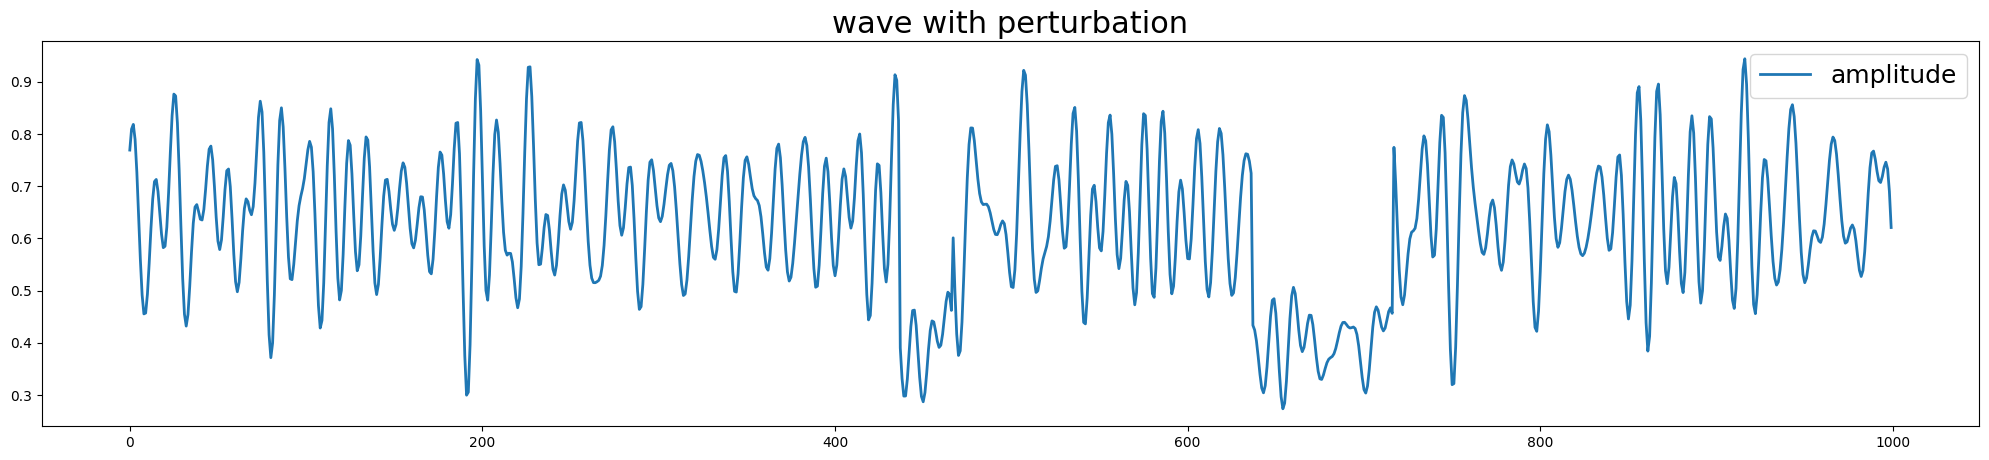

In [39]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(wave)), wave, label='amplitude', linewidth=2)
plt.title(f"wave with perturbation", fontsize=22)
plt.legend(fontsize=18)
plt.show()